In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe = pd.read_csv('Descargas/fiuba-trocafone-tp1-final-set/events.csv')

In [88]:
dataframe.columns

prod=dataframe[dataframe['event'] == 'conversion']
prod['marca'] = prod['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

Text(0,0.5,'Marca')

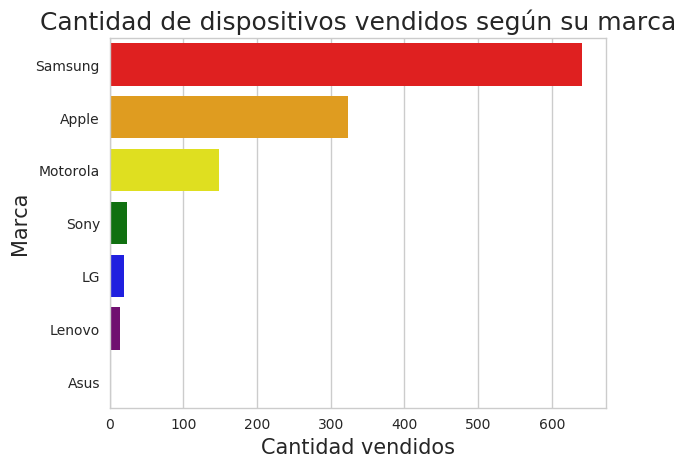

In [80]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = sns.barplot(x=marcas.values, y=marcas.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Text(0.5,0,'Modelo')

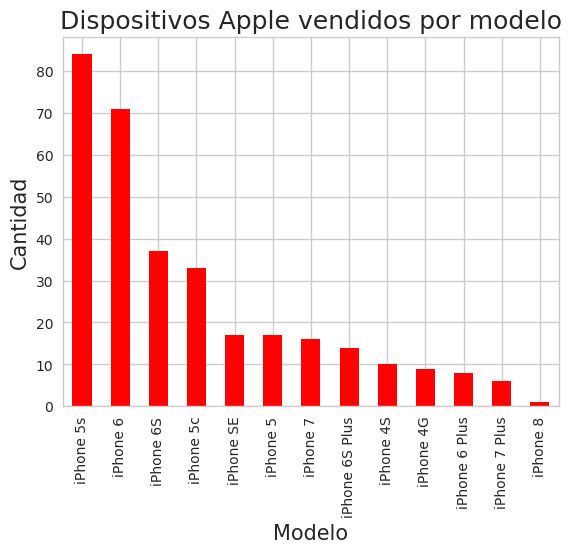

In [90]:
'''
Grafico de barras de dispositivos Apple mas vendidos.
'''

AppleVendidos = prod.loc[prod.marca == 'Apple',:]['model'].value_counts()
AppleVendidos

g = AppleVendidos.plot.bar(color=['red'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

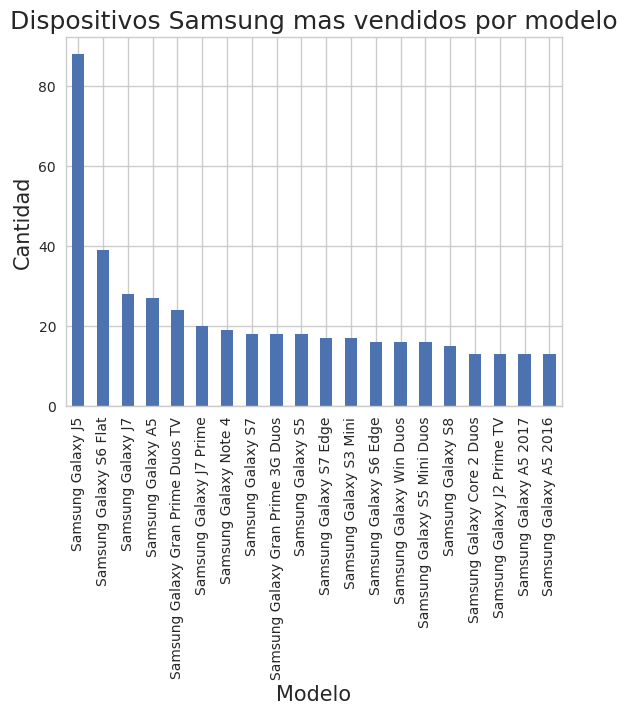

In [39]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.
'''
SamsungVendidos = prod.loc[prod.marca == 'Samsung',:]['model'].value_counts().head(20)
SamsungVendidos

g = SamsungVendidos.plot.bar(color=[''])
g.set_title("Dispositivos Samsung mas vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

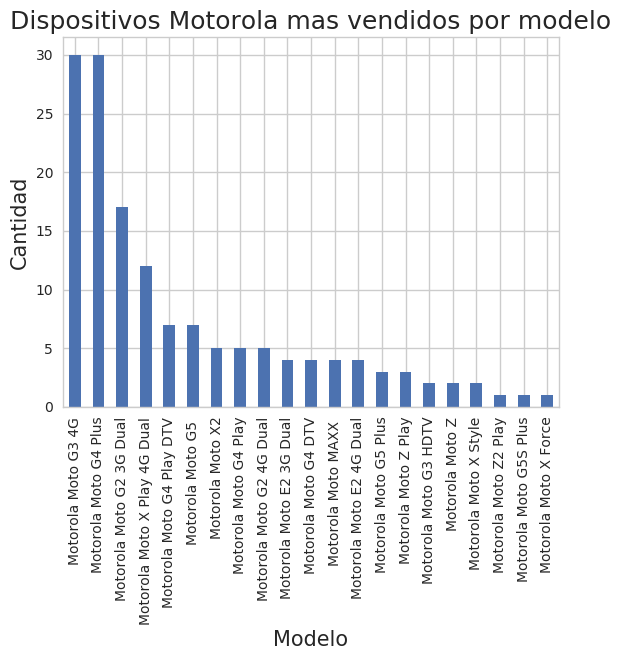

In [41]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
MotorolaVendidos = prod.loc[prod.marca == 'Motorola',:]['model'].value_counts()
MotorolaVendidos

g = MotorolaVendidos.plot.bar()
g.set_title("Dispositivos Motorola mas vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

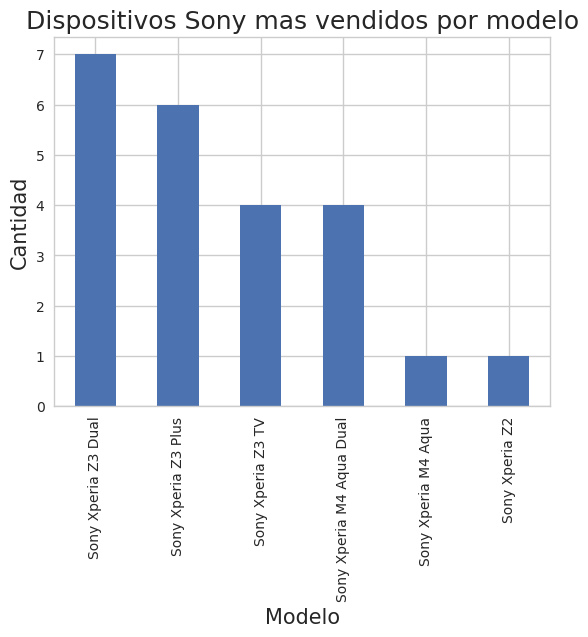

In [44]:
'''
Grafico de barras de dispositivos Sony mas vendidos.
'''
SonyVendidos = prod.loc[prod.marca == 'Sony',:]['model'].value_counts()
SonyVendidos

g = SonyVendidos.plot.bar()
g.set_title("Dispositivos Sony mas vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

In [43]:
prod=dataframe[dataframe['event'] == 'conversion']
prod['model'].value_counts()
prod.loc[dataframe.model.str.contains('Asus',na=False),:]['model'].value_counts()

Asus Zenfone 3 Max 16 GB    1
Asus Zenfone 5              1
Name: model, dtype: int64

In [6]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str

In [53]:
dataframe

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,a,b
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,NaN,NaN
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,"2,694.00",iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,5s
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,"2,694.00",iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,5s
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,"15,338.00",Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,Galaxy S8
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,NaN,NaN
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,"15,338.00",Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,Galaxy S8
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,NaN,NaN


In [7]:
prod=dataframe[dataframe['event'] == 'conversion']
prod['marca'] = prod['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

marcas = prod['marca'].value_counts()
marcas

Samsung     641
Apple       323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: marca, dtype: int64

Text(0.5,0,'Marca')

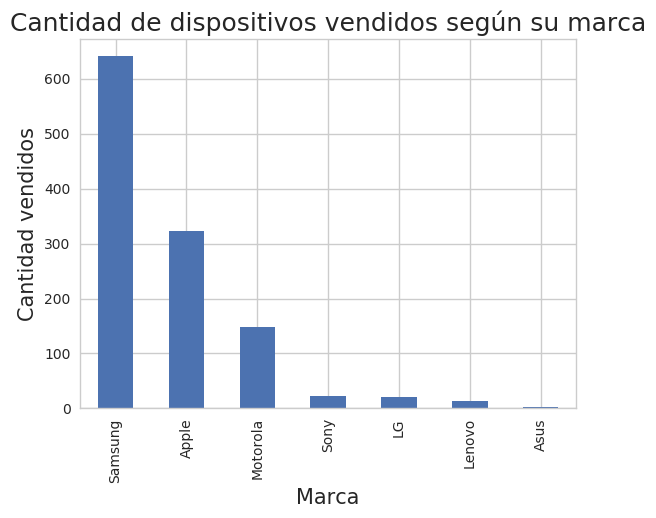

In [10]:
g = marcas.plot.bar()
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_ylabel("Cantidad vendidos", fontsize=15)
g.set_xlabel("Marca", fontsize=15)

In [ ]:
prod=dataframe[dataframe['event'] == 'conversion']
prod['marca'] = prod['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

marcas = prod['marca']
marcas